In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

In [4]:
from google.colab import drive
url = '/content/drive/MyDrive/Colab Notebooks/Datasetmold_New800.csv'
df = pd.read_csv(url)
df

,Status,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
0,Mahal,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
1,Mahal,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
2,Mahal,4,KAON,Wireless,1,170,PC,NO,STAVAX,NAK80,YES,YES,3P PIN GATE,NOTYET,SEHYUN,590,334600000
3,Mahal,4,KAON,Wireless,1,170,ABS (V0),YES,SKD61,SKD61,NO,YES,3P PIN GATE,NOTYET,SEHYUN,484,341600000
4,Murah,3,KAON,Wireless,2,100,XG 569C,NO,STAVAX,NAK80,YES,NO,3P PIN GATE,NOTYET,SEHYUN,196,112000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Mahal,4,KITADA,Car,1,450,PC-ABS,NO,HP4M,HP4M,YES,YES,2P H.R VALVE 1 ZONE,YUDO-INDONESIA,JXMould(CHINA),1960,610554000
797,Mahal,3,KITADA,Car,2,220,PP,NO,HP4M,HP4M,YES,NO,2P SIDE GATE,NOTYET,GAYA,675,287770000
798,Murah,3,KITADA,Car,2,150,POM,NO,HP4M,HP4M,NO,NO,2P SIDE GATE,NOTYET,GAYA,273,206108000
799,Mahal,3,KITADA,Car,2,80,PA6,NO,2738,2738,YES,NO,2P SIDE GATE,NOTYET,GAYA,155,177912000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   801 non-null    object
 1   Grade                    801 non-null    int64 
 2   Customer                 801 non-null    object
 3   Part_aplication          801 non-null    object
 4   Qty-Product              801 non-null    int64 
 5   Injection(Ton)           801 non-null    int64 
 6   Resin_plastic            801 non-null    object
 7   Texture-Product          801 non-null    object
 8   Cavity.Material          801 non-null    object
 9   Core.Material            801 non-null    object
 10  Slide-System             801 non-null    object
 11  Lift-Core-System         801 non-null    object
 12  Mold-Design.Type         801 non-null    object
 13  HOT-RUNNER               801 non-null    object
 14  Mold/Base_Order-Company  801 non-null    o

In [6]:
x=df.drop("Status",axis=1)
y=df["Status"]
x.head()

,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
0,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
1,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
2,4,KAON,Wireless,1,170,PC,NO,STAVAX,NAK80,YES,YES,3P PIN GATE,NOTYET,SEHYUN,590,334600000
3,4,KAON,Wireless,1,170,ABS (V0),YES,SKD61,SKD61,NO,YES,3P PIN GATE,NOTYET,SEHYUN,484,341600000
4,3,KAON,Wireless,2,100,XG 569C,NO,STAVAX,NAK80,YES,NO,3P PIN GATE,NOTYET,SEHYUN,196,112000000


In [7]:
Encoder_X = LabelEncoder()
for col in x.columns:
    x[col] = Encoder_X.fit_transform(x[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
x

,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
0,2,6,4,0,30,84,0,5,7,1,1,54,3,1,402,295
1,2,6,4,0,30,84,0,5,7,1,1,54,3,1,402,295
2,3,27,13,0,16,50,0,17,11,1,1,73,3,6,232,237
3,3,27,13,0,16,3,1,16,20,0,1,73,3,6,193,244
4,2,27,13,1,8,114,0,17,11,1,0,73,3,6,75,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,3,28,2,0,30,64,0,5,7,1,1,21,5,3,400,367
797,2,28,2,1,20,74,0,5,7,1,0,54,3,2,256,199
798,2,28,2,1,14,71,0,5,7,0,0,54,3,2,112,124
799,2,28,2,1,6,40,0,1,2,1,0,54,3,2,53,96


In [8]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [9]:
import seaborn as sns

In [10]:
# Calculate the correlation matrix
corr_matrix = x.corr()

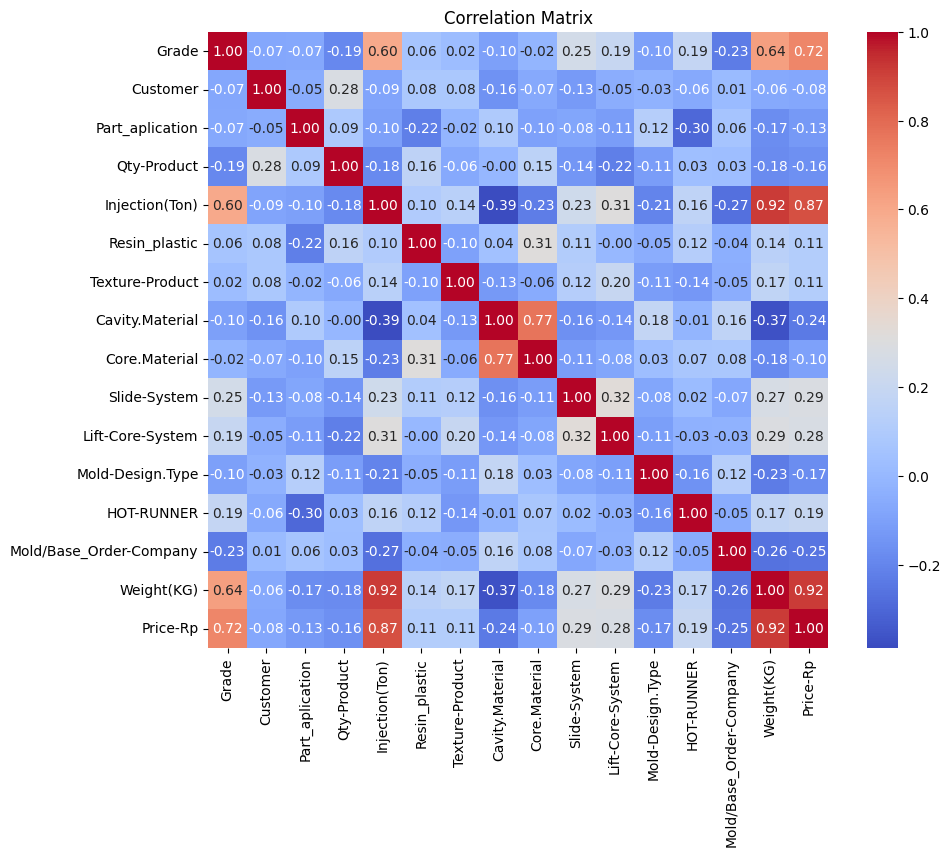

In [11]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Scatterplot for pairs of features with high correlation
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.5]


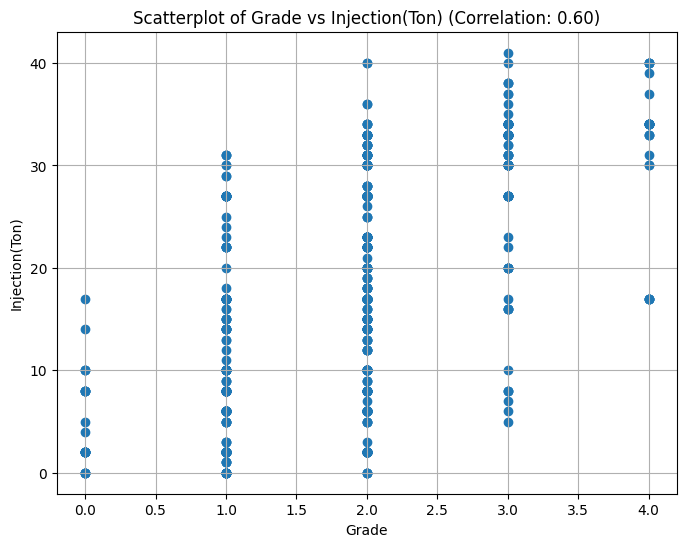

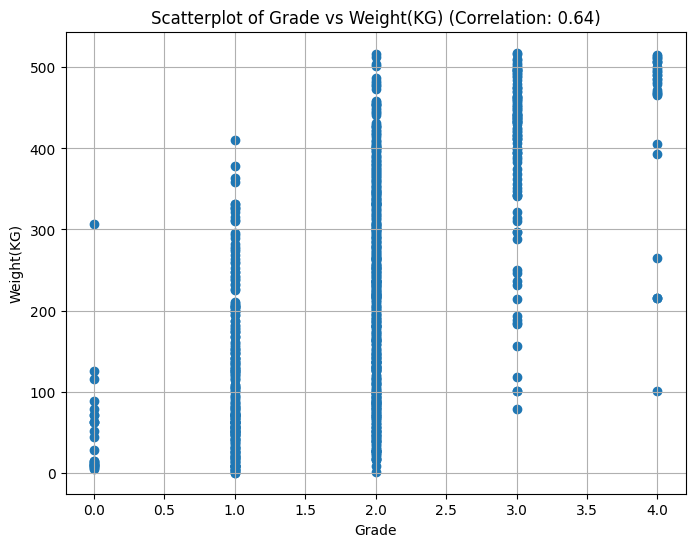

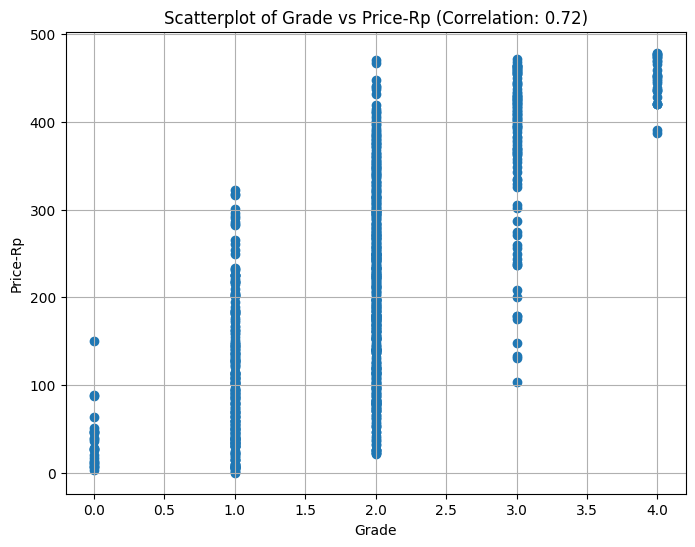

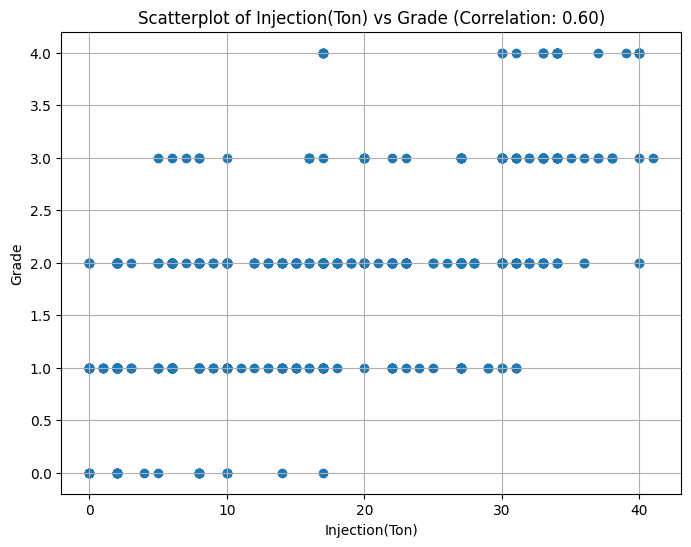

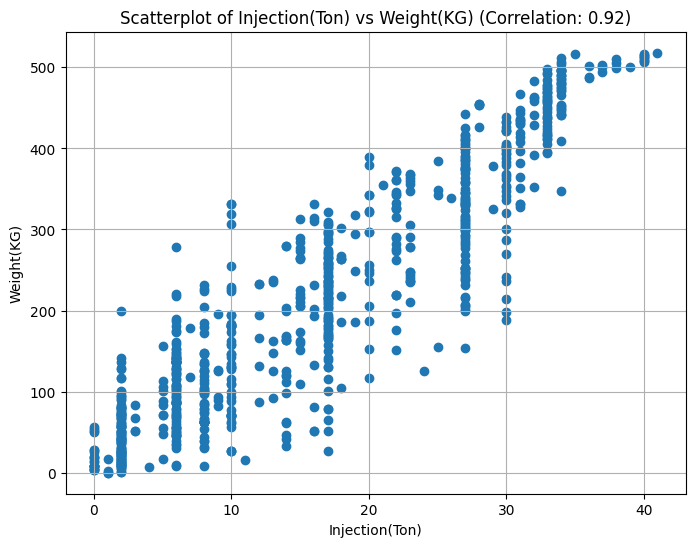

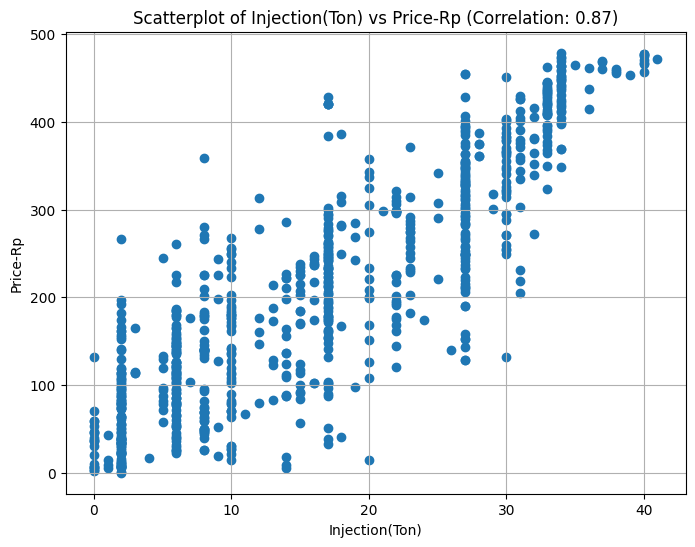

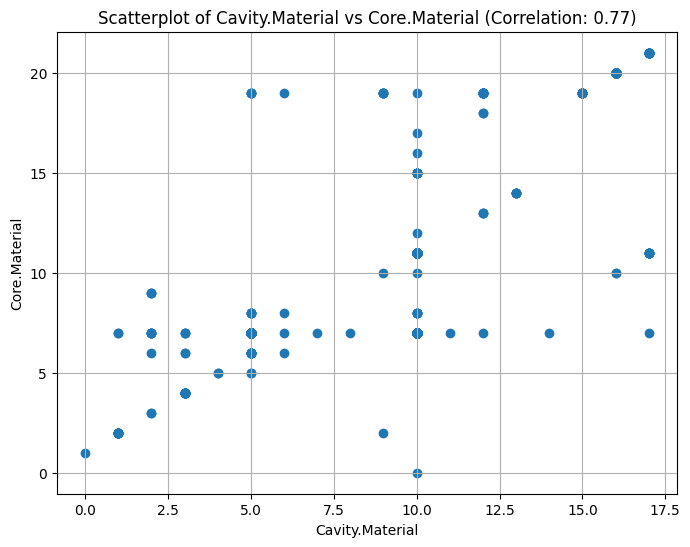

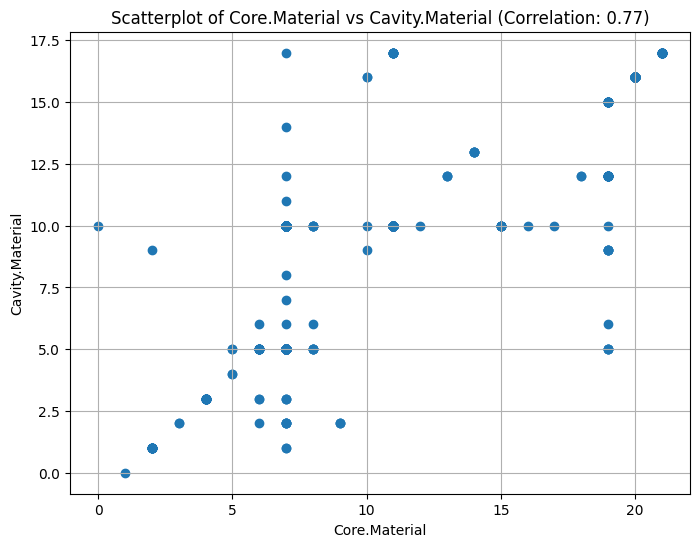

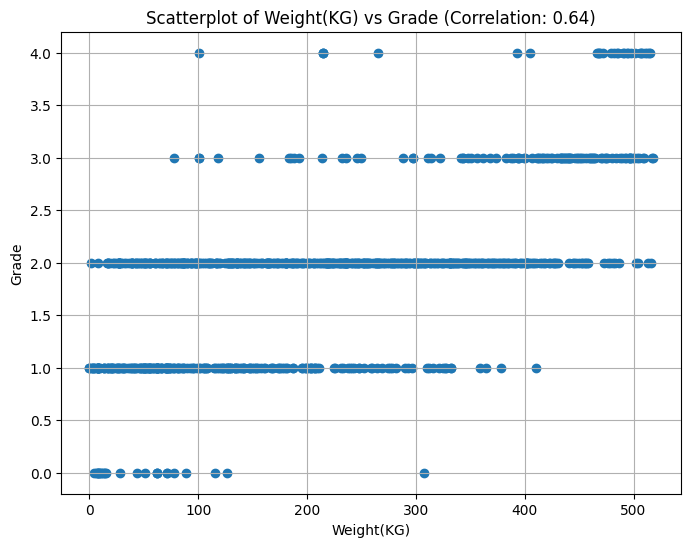

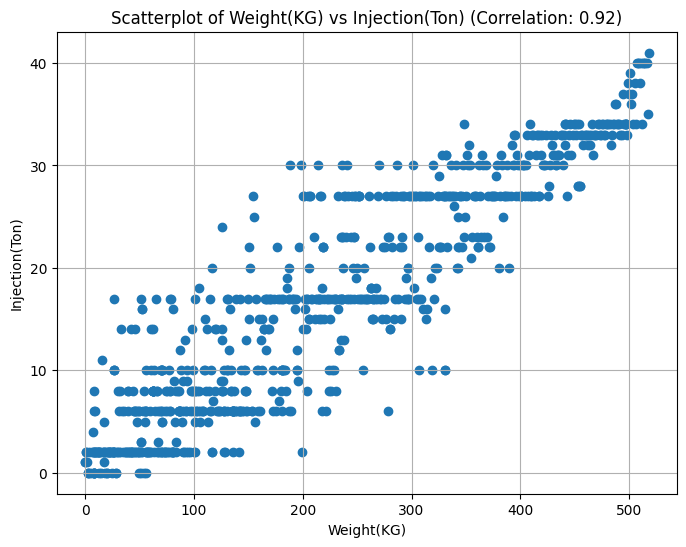

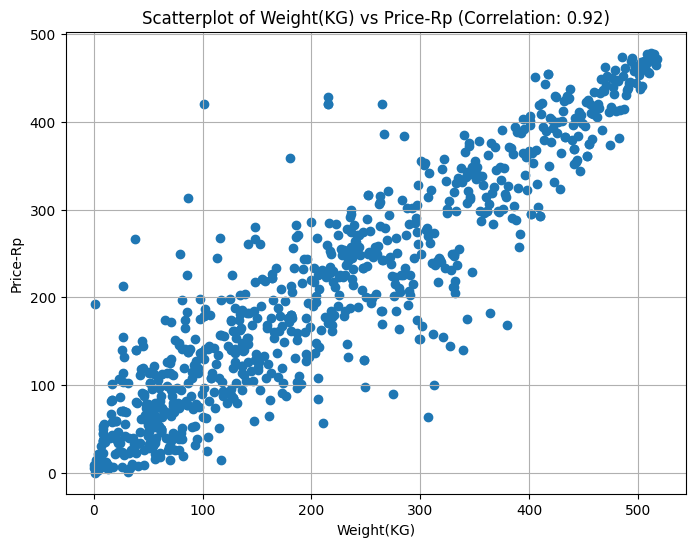

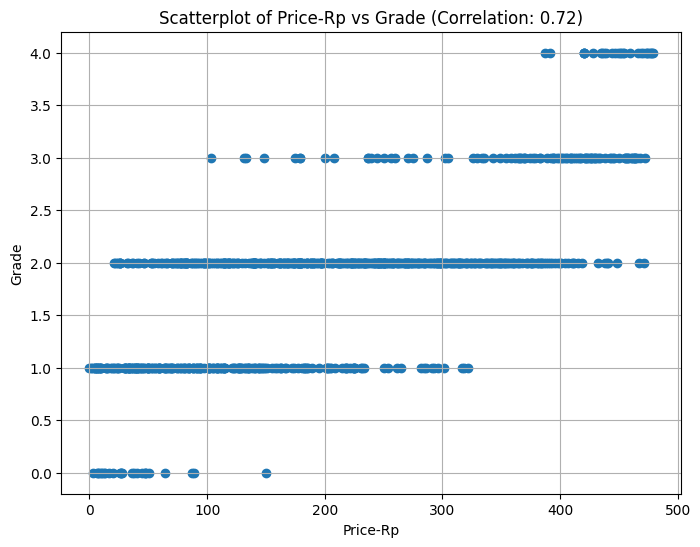

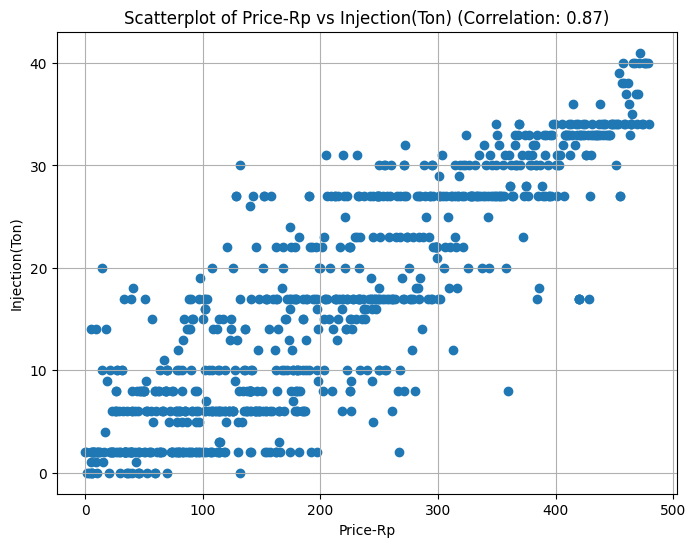

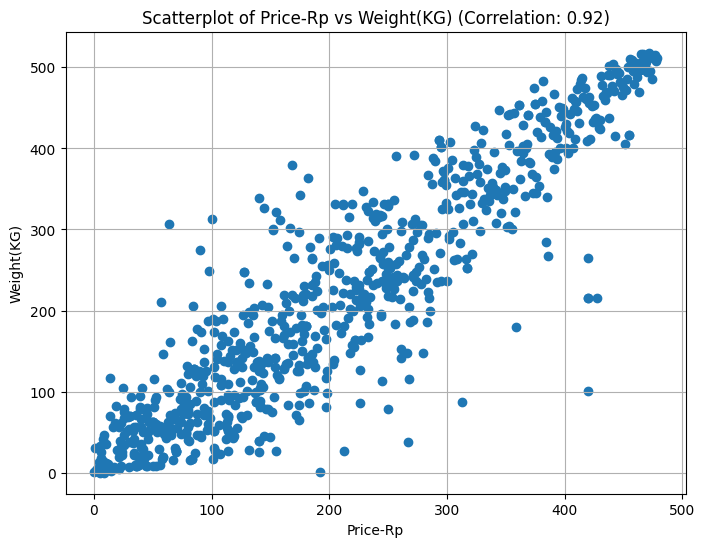

In [13]:
for col1, col2 in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(x[col1], x[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatterplot of {col1} vs {col2} (Correlation: {corr_matrix.loc[col1, col2]:.2f})')
    plt.grid(True)
    plt.show()

In [14]:
# tampilan correlation dengan 'Price-Rp'
price_corr = corr_matrix['Price-Rp'].sort_values(ascending=False)
print("Korelasi dengan Harga (Price-Rp):")
print(price_corr)

Korelasi dengan Harga (Price-Rp):
Price-Rp                   1.000000
Weight(KG)                 0.915588
Injection(Ton)             0.869381
Grade                      0.716877
Slide-System               0.288779
Lift-Core-System           0.277878
HOT-RUNNER                 0.192898
Texture-Product            0.112105
Resin_plastic              0.111843
Customer                  -0.075362
Core.Material             -0.098622
Part_aplication           -0.129364
Qty-Product               -0.161164
Mold-Design.Type          -0.170270
Cavity.Material           -0.237517
Mold/Base_Order-Company   -0.252541
Name: Price-Rp, dtype: float64


In [34]:
# Filter atribut yang memiliki korelasi kuat dengan 'Price-Rp'
threshold = 0.2  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan
price_corr = corr_matrix['Price-Rp'].sort_values(ascending=False)
strong_correlation = price_corr[(price_corr > threshold) | (price_corr < -threshold)]
print("\nAtribut dengan korelasi kuat dengan Price-Rp (>|0.2|):")
print(strong_correlation)



Atribut dengan korelasi kuat dengan Price-Rp (>|0.2|):
Price-Rp                   1.000000
Weight(KG)                 0.915588
Injection(Ton)             0.869381
Grade                      0.716877
Slide-System               0.288779
Lift-Core-System           0.277878
Cavity.Material           -0.237517
Mold/Base_Order-Company   -0.252541
Name: Price-Rp, dtype: float64
